In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.txt', delimiter=',', header=0)
df.head()

,Date,Time,Acel_X,Acel_Y,Acel_Z,Gyro_X,Gyro_Y,Gyro_Z,Temp
0,2023-07-27,12:00:16,624,-3264,17740,-6639,2144,864,42.22
1,2023-07-27,12:00:16,64,-5664,19296,1666,8530,6622,42.46
2,2023-07-27,12:00:17,-9004,2140,10868,32767,8610,4418,42.41
3,2023-07-27,12:00:17,-4852,-13404,6608,1247,-221,-5576,42.32
4,2023-07-27,12:00:18,-1024,-2784,17924,14164,-2245,300,42.46


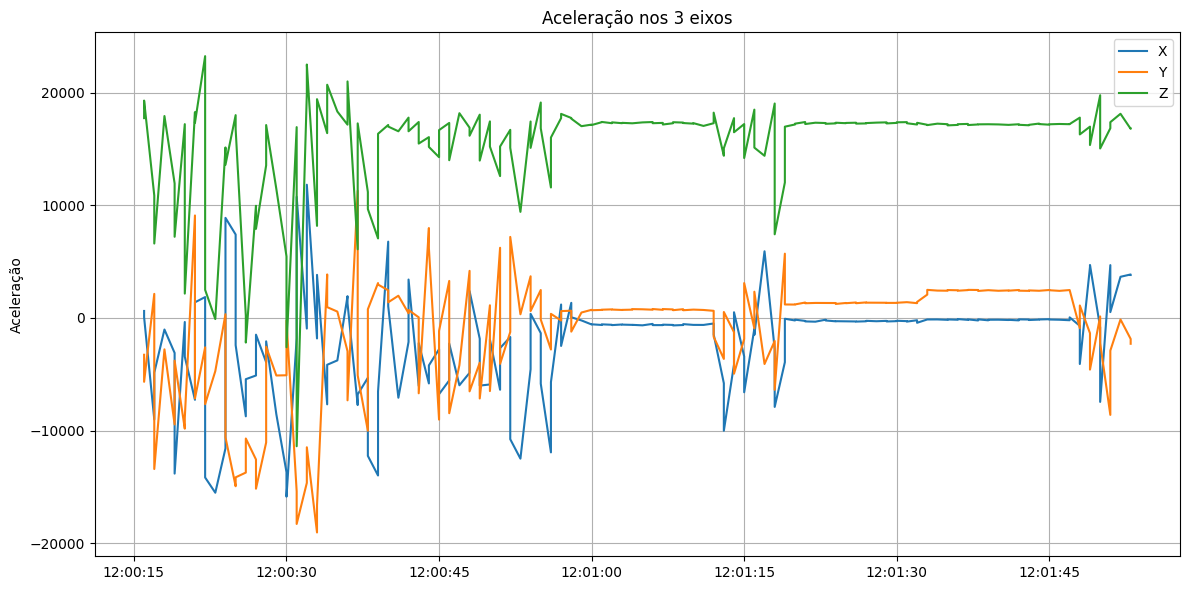

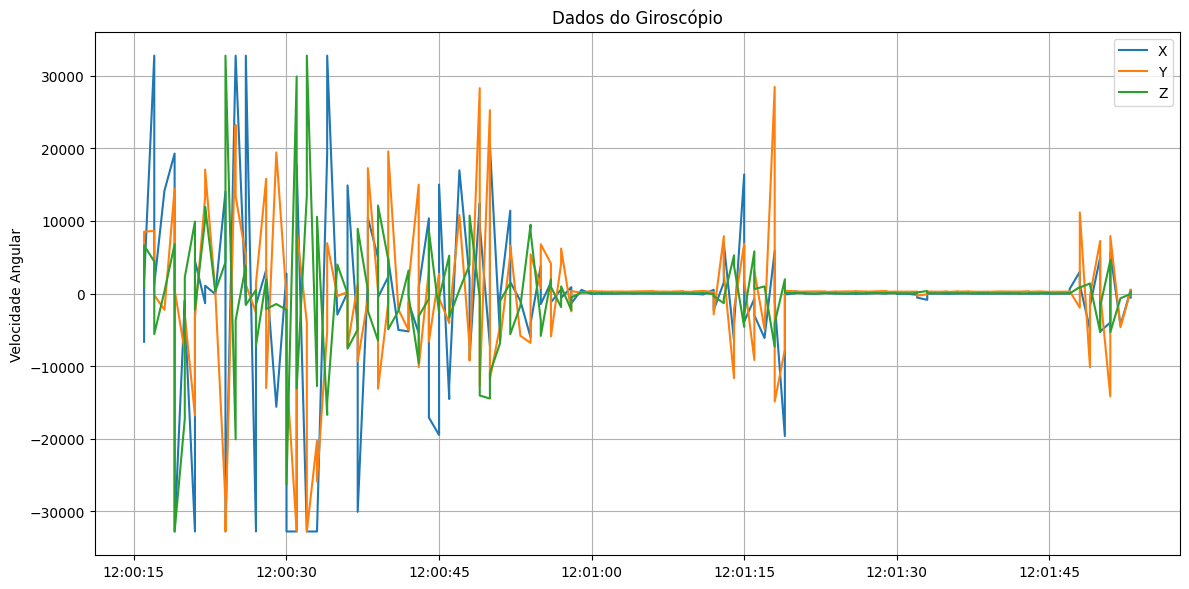

In [3]:
# Preparação dos dados - criar coluna de timestamp
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('Timestamp')

# Gráfico de aceleração nos 3 eixos
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Acel_X'], label='X')
plt.plot(df.index, df['Acel_Y'], label='Y')
plt.plot(df.index, df['Acel_Z'], label='Z')
plt.title('Aceleração nos 3 eixos')
plt.ylabel('Aceleração')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico separado para giroscópio
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Gyro_X'], label='X')
plt.plot(df.index, df['Gyro_Y'], label='Y')
plt.plot(df.index, df['Gyro_Z'], label='Z')
plt.title('Dados do Giroscópio')
plt.ylabel('Velocidade Angular')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

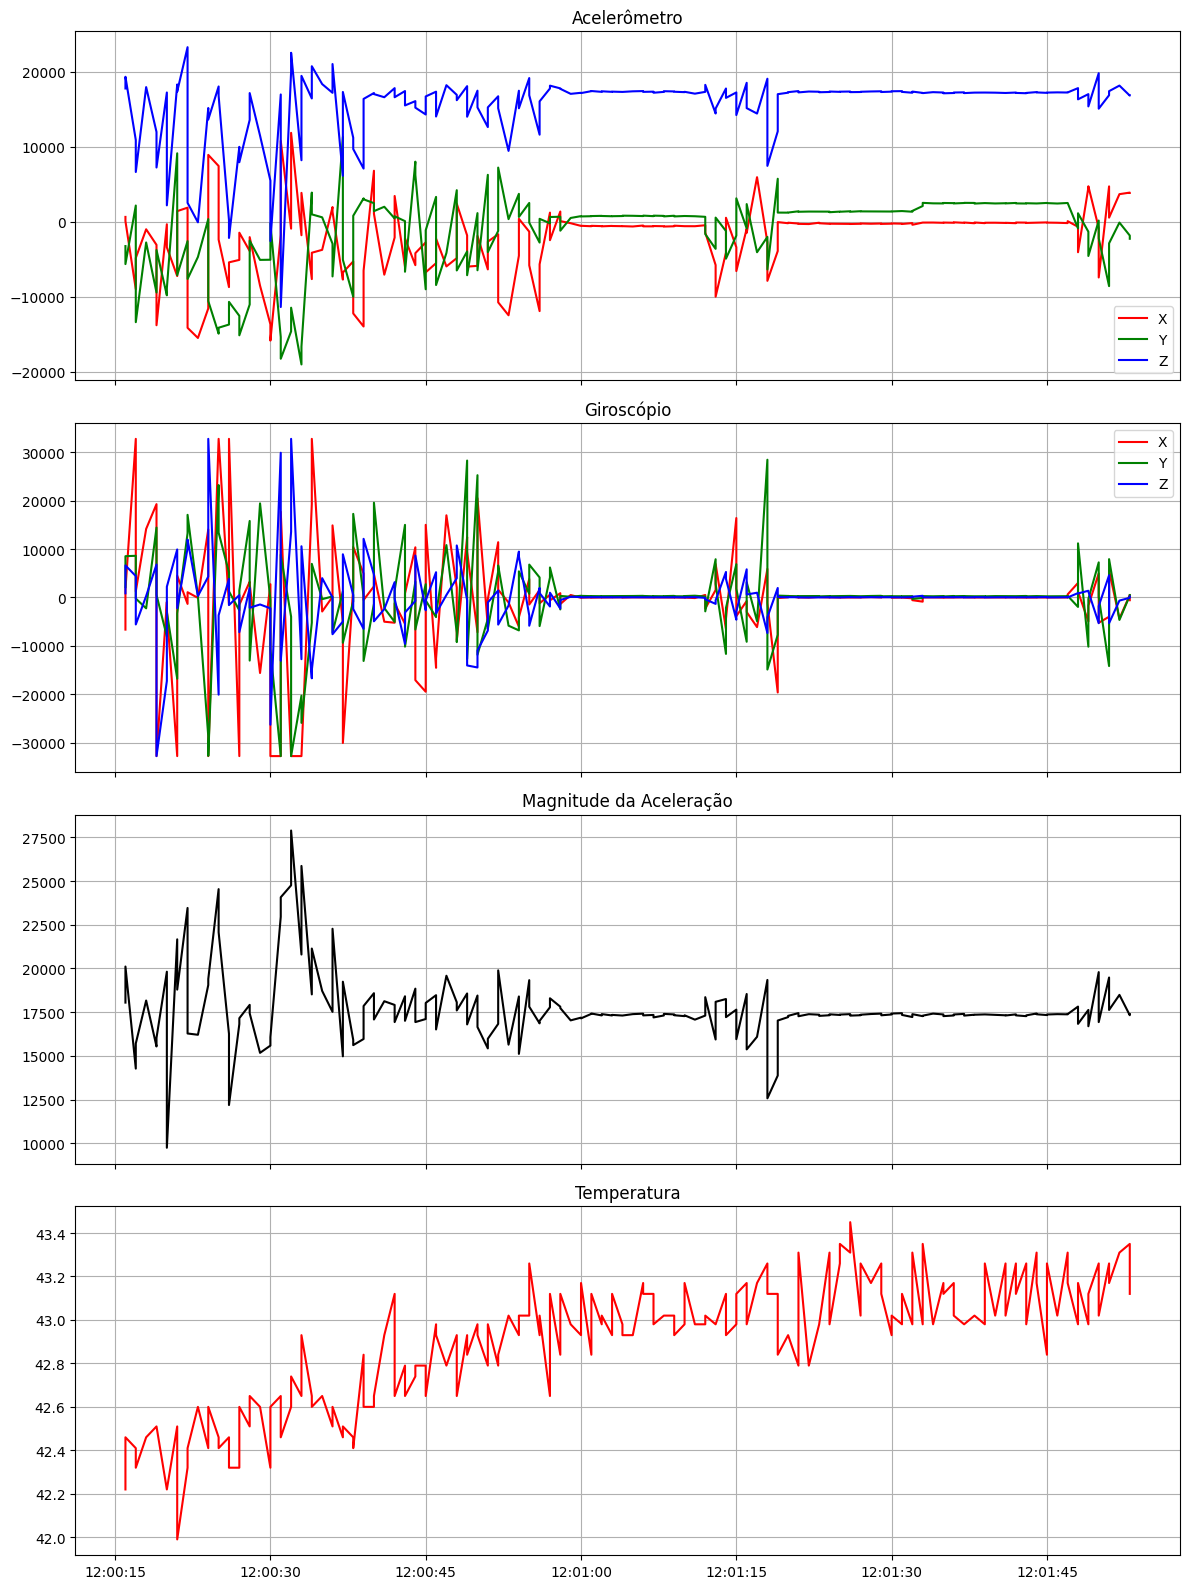

In [4]:
# Cria subplots para todos os sensores
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Acelerômetro
axes[0].plot(df.index, df['Acel_X'], 'r-', label='X')
axes[0].plot(df.index, df['Acel_Y'], 'g-', label='Y')
axes[0].plot(df.index, df['Acel_Z'], 'b-', label='Z')
axes[0].set_title('Acelerômetro')
axes[0].legend()
axes[0].grid(True)

# Giroscópio
axes[1].plot(df.index, df['Gyro_X'], 'r-', label='X')
axes[1].plot(df.index, df['Gyro_Y'], 'g-', label='Y')
axes[1].plot(df.index, df['Gyro_Z'], 'b-', label='Z')
axes[1].set_title('Giroscópio')
axes[1].legend()
axes[1].grid(True)

# Magnitude da aceleração
df['Acel_Mag'] = np.sqrt(df['Acel_X']**2 + df['Acel_Y']**2 + df['Acel_Z']**2)
axes[2].plot(df.index, df['Acel_Mag'], 'k-')
axes[2].set_title('Magnitude da Aceleração')
axes[2].grid(True)

# Temperatura
axes[3].plot(df.index, df['Temp'], 'r-')
axes[3].set_title('Temperatura')
axes[3].grid(True)

plt.tight_layout()
plt.show()

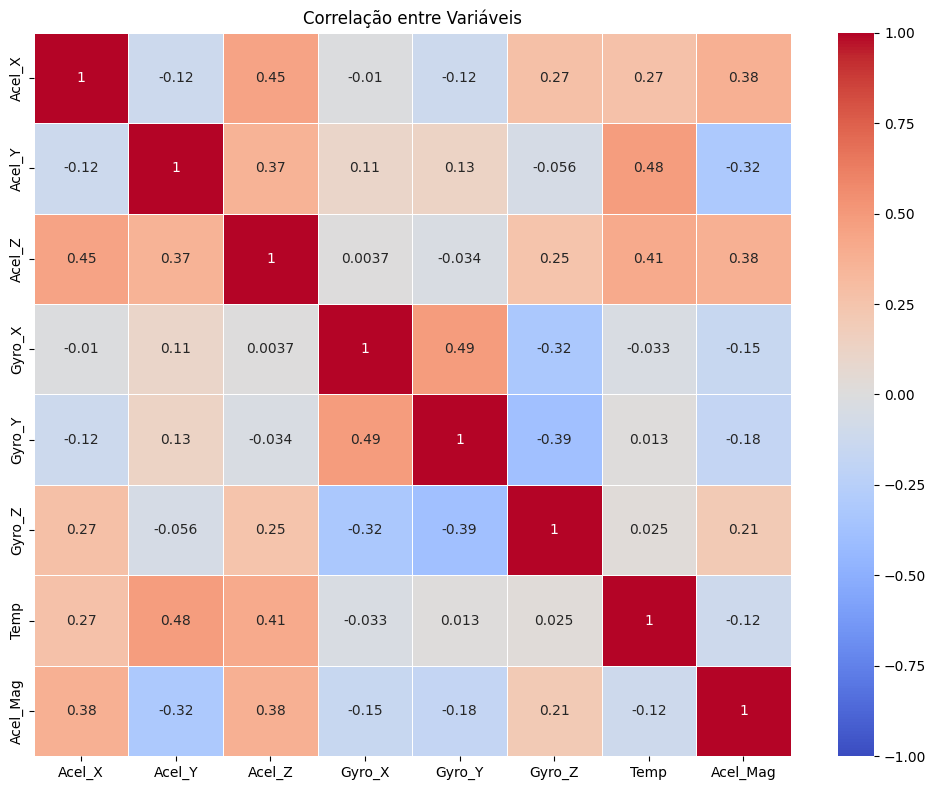

In [5]:
# Selecione apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Criar mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlação entre Variáveis')
plt.tight_layout()
plt.show()

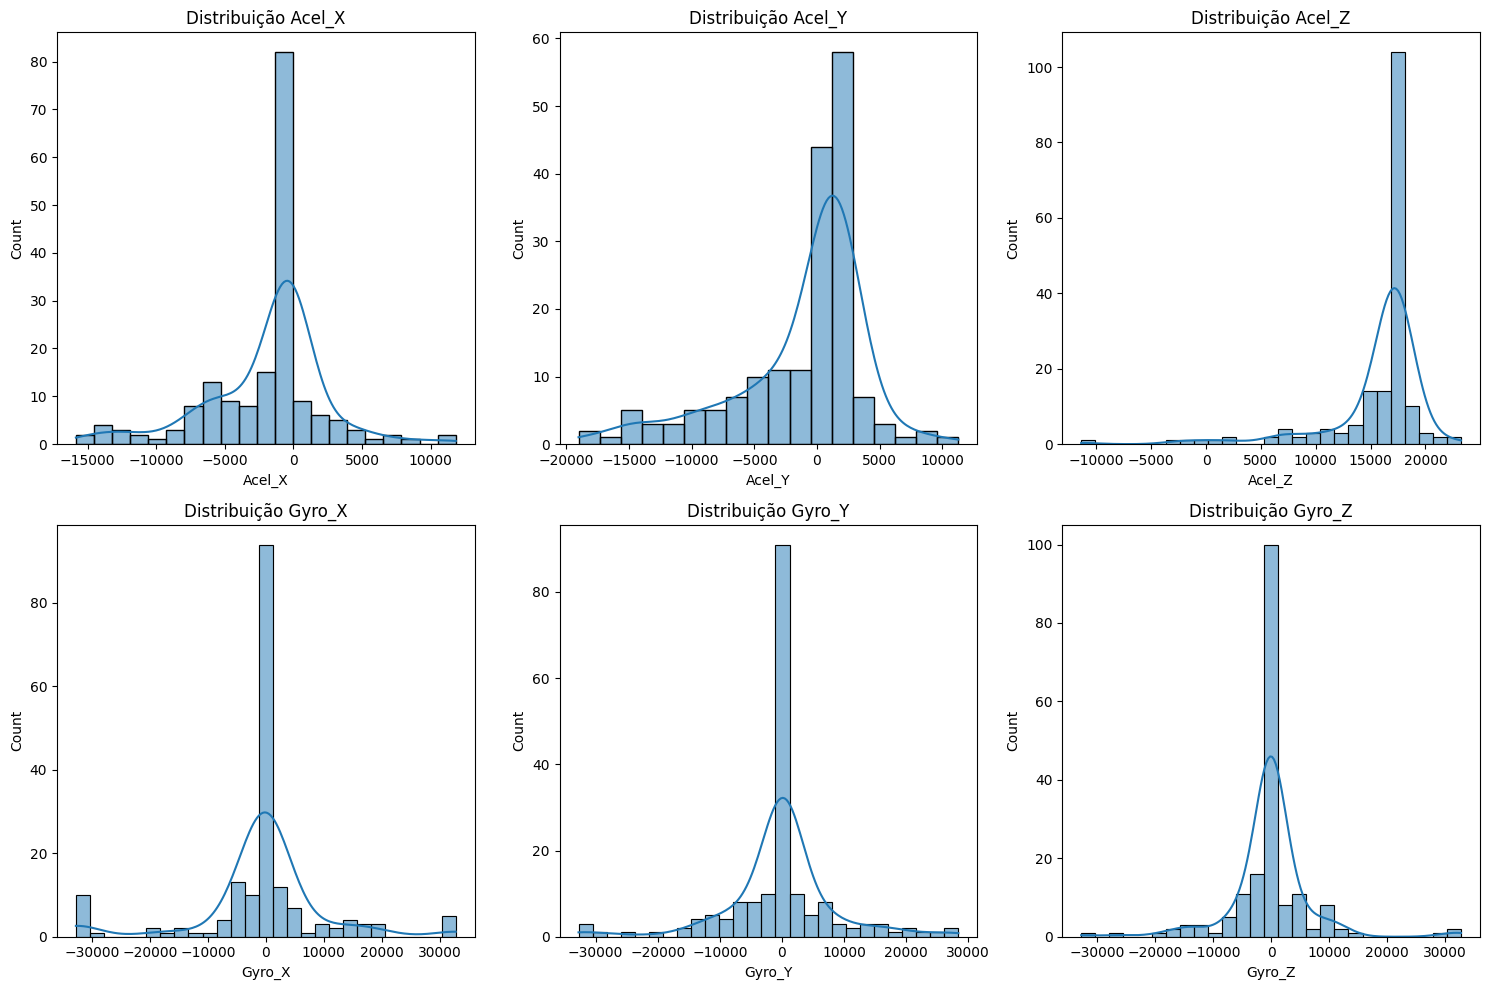

In [6]:
# Criar histogramas para todos os sensores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Acelerômetro
sns.histplot(df['Acel_X'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribuição Acel_X')
sns.histplot(df['Acel_Y'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribuição Acel_Y')
sns.histplot(df['Acel_Z'], kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribuição Acel_Z')

# Giroscópio
sns.histplot(df['Gyro_X'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribuição Gyro_X')
sns.histplot(df['Gyro_Y'], kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribuição Gyro_Y')
sns.histplot(df['Gyro_Z'], kde=True, ax=axes[1,2])
axes[1,2].set_title('Distribuição Gyro_Z')

plt.tight_layout()
plt.show()